In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 97.8 MB/s 
     |████████████████████████████████| 981 kB 65.1 MB/s 
     |████████████████████████████████| 265 kB 76.0 MB/s 
     |████████████████████████████████| 3.8 MB 67.9 MB/s 
     |████████████████████████████████| 1.3 MB 68.3 MB/s 
     |████████████████████████████████| 468 kB 75.1 MB/s 
     |████████████████████████████████| 7.6 MB 62.7 MB/s 
     |████████████████████████████████| 880 kB 76.8 MB/s 
     |████████████████████████████████| 182 kB 77.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.32.3-py3-none-any.whl size=25313585 sha256=6bc60b15b72ecc217a8605a6b8a479cfbeabcd4b103d088eb59d2ea9658282ab
  Stored in directory: /root/.cache/pip/wheels/c4/a0/4b/38365824295b72c59f340fce7927cdb5438d2705f5dbbe47b7
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=5eeb4feea21f741f44f0f4b

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
print(data_train.shape, data_test.shape)

(4457, 2) (1115, 2)


In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df=data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert') # or distilbert

['ham', 'spam']
      ham  spam
4040  1.0   0.0
3118  1.0   0.0
196   1.0   0.0
496   1.0   0.0
944   1.0   0.0
['ham', 'spam']
      ham  spam
3903  1.0   0.0
2221  1.0   0.0
2521  1.0   0.0
5226  1.0   0.0
1069  0.0   1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
743/743 [==============================] - 461s 594ms/step - loss: 0.2780 - accuracy: 0.9163
Epoch 2/2
743/743 [==============================] - 139s 187ms/step - loss: 1.4158 - accuracy: 0.8016


done.
Visually inspect loss plot and select learning rate associated with falling loss


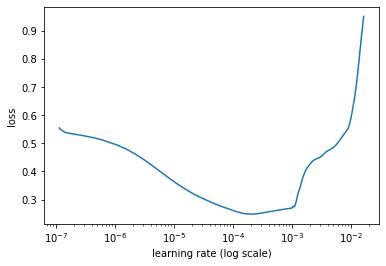

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
# Essentially fit is a very basic training loop, 
# whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bert-spam-classifier')    



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 504s 654ms/step - loss: 0.0802 - accuracy: 0.9755 - val_loss: 0.0169 - val_accuracy: 0.9955


In [ ]:
msg1 = ['Freemsg: 1-month unlimited free calls! Activate SmartCall Txt: CALL to No: 68866. Subscriptn3gbp/wk unlimited calls Help: 08448714184 Stop?txt stop landlineonly']
msg2 = ['Beautiful Truth against Gravity.. Read carefully: "Our heart feels light when someone is in it.. But it feels very heavy when someone leaves it.."']

In [ ]:
predictor.predict(msg1)

1/1 [==============================] - 6s 6s/step


['spam']

In [ ]:
predictor.predict(msg2)

1/1 [==============================] - 0s 76ms/step


['ham']